# Example of using `pandas` to read data and `seaborn` to plot it

Note: This cell is a `markdown` cell instead of a `code` cell.

In [1]:
import pandas as pd
import seaborn as sns

I went to Philly's open data portal and found a dataset that would make for some nice graphs. Feel free to swap out the URL below with something else! This example will plot COVID test results (positive vs. negative) by date.

In [2]:
data_url = "https://phl.carto.com/api/v2/sql?q=SELECT+*+FROM+covid_cases_by_date&filename=covid_cases_by_date&format=csv&skipfields=cartodb_id"

If you have a file on your local hard drive, you can point to it using the filepath.

In [3]:
local_path = r"/Users/aaron/Downloads/covid_cases_by_date.csv"

### Read the raw data into a `pandas.DataFrame`. By convention, we'll name our new dataframe `df`

In [4]:
df = pd.read_csv(data_url)

Use the notebook environment to explore your data. To see the first five rows of the data, use `df.head()`

In [5]:
df.head()

,the_geom,the_geom_webmercator,collection_date,count,test_result,etl_timestamp
0,NaN,NaN,2020-09-24,120,positive,2020-10-29 17:20:02
1,NaN,NaN,2020-10-22,4493,negative,2020-10-29 17:20:02
2,NaN,NaN,2020-06-13,2037,negative,2020-10-29 17:20:02
3,NaN,NaN,2020-07-01,2520,negative,2020-10-29 17:20:02
4,NaN,NaN,2020-03-17,315,negative,2020-10-29 17:20:02


Notice all those `NaN` values (meaning "not a number"). If you want to see all values in a column and how many times they're used, you can do `df.column_name.value_counts()`

In [6]:
df.the_geom.value_counts()

Series([], Name: the_geom, dtype: int64)

The output above shows us that there is not a single record in this column. As a result, we'll ignore it. What about some of the other columns?

In [7]:
df.test_result.value_counts()

negative    237
positive    231
Name: test_result, dtype: int64

### Now let's filter our data into two dataframes: one with positive results, the other with negative results

In [8]:
df_positive = df[df.test_result == "positive"]
df_negative = df[df.test_result == "negative"]

Run the `.value_counts()` again on one of these new dataframes to confirm things were filtered properly

In [9]:
df_positive.test_result.value_counts()

positive    231
Name: test_result, dtype: int64

### Data cleanup: let's sort each of these dataframes by their `collection_date`

In [10]:
df = df.sort_values(by="collection_date")
df_positive = df_positive.sort_values(by="collection_date")
df_negative = df_negative.sort_values(by="collection_date")

### Now let's plot the positive case numbers over time.

First we'll do one graph for each filtered dataframe, then we'll do one with both results combined. Notice that the code is the same on each of the 3 lines, with the only difference being the value passed to the `data=` part.

However, before we do any plotting, let's define a standard width/height for seaborn to use.

In [11]:
sns.set(rc={'figure.figsize':(15, 4.5)})

<AxesSubplot:xlabel='collection_date', ylabel='count'>

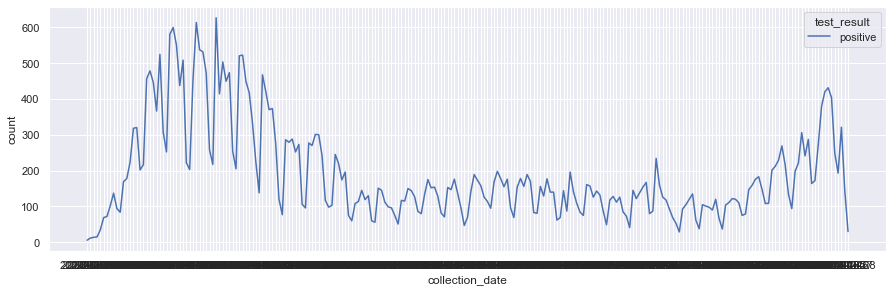

In [12]:
sns.lineplot(data=df_positive, x="collection_date", y="count", hue="test_result")

<AxesSubplot:xlabel='collection_date', ylabel='count'>

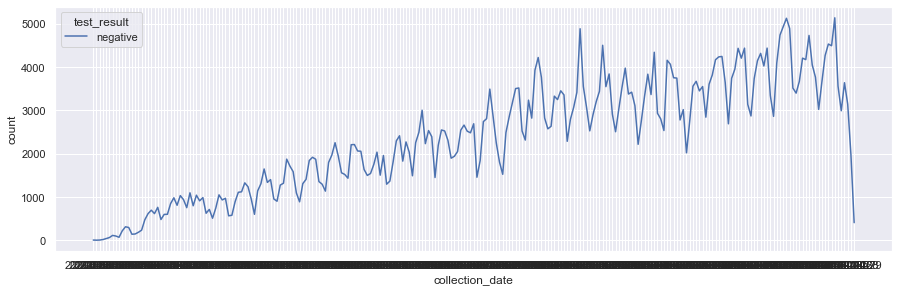

In [13]:
sns.lineplot(data=df_negative, x="collection_date", y="count", hue="test_result")

<AxesSubplot:xlabel='collection_date', ylabel='count'>

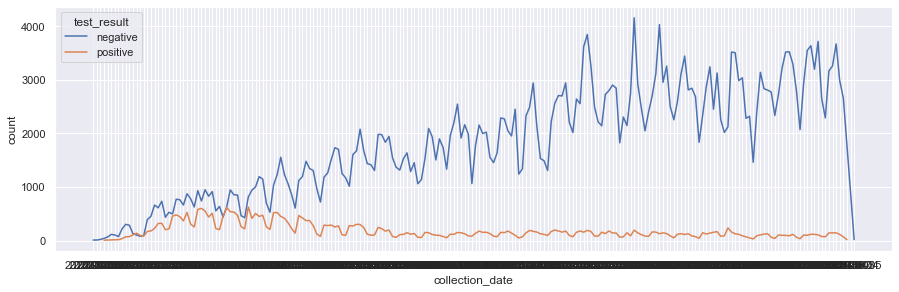

In [78]:
sns.lineplot(data=df, x="collection_date", y="count", hue="test_result")

### Let's filter it down to only the records since July 2020, and plot again

In [14]:
df_timefilter = df[df.collection_date >= '2020-07-01']

<AxesSubplot:xlabel='collection_date', ylabel='count'>

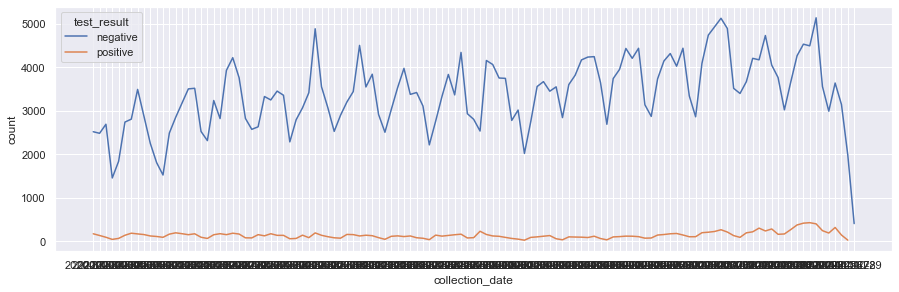

In [15]:
sns.lineplot(data=df_timefilter, x="collection_date", y="count", hue="test_result")

### Other kinds of plots

What about a graph that shows the rolling average instead of the spiky daily data?

<AxesSubplot:xlabel='collection_date', ylabel='count'>

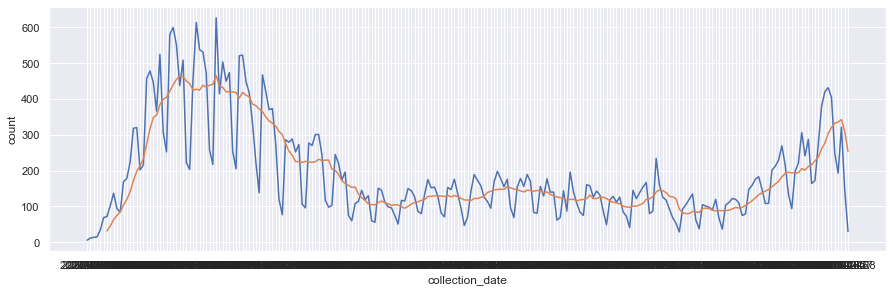

In [16]:
# Calculate the 7-day rolling average and add it as a new column in the dataframe
df_positive['rolling average'] = df_positive['count'].rolling(7).mean()

# Plot the graph twice, once for the raw data and once for the rolling average

# To do this we'll need to import/use matplotlib (which seaborn is based on top of)
import matplotlib.pyplot as plt

# Create an empty plot that we'll add our two line series to
fig, ax = plt.subplots()


# Make two plots, but in each of them refer to the 'ax' variable we just defined
sns.lineplot(data=df_positive, x="collection_date", y="count", ax=ax)
sns.lineplot(data=df_positive, x="collection_date", y="rolling average", ax=ax)